<center><h1>Deepa_Avhad_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

HW1: Vertebral Column Data <br>
Name: Deepa Avhad <br>
USC ID: 7023239026 <br>
git-hub username: d-avhad

References taken from: <br>
1)https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn <br>
2)https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55 <br>
3)StackOverflow <br>
4)w3 schools <br>


### (a) Download Data

Package-imports

In [112]:
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.ticker as mticker

#arr=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope","pelvic_radius", "degree_spondylolisthesis"] 



Get the Vertebral Column Data Set and replace AB, NO with 1, 0 class respectively.

In [113]:
#read dataset

df = pd.read_csv('../data/vertebral_column_data/column_2C.dat', sep='\s', engine='python',names=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope","pelvic_radius", "degree_spondylolisthesis","class"])

df['class']=df['class'].replace({'AB':1,'NO':0})

arr=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope","pelvic_radius", "degree_spondylolisthesis"] 






### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [114]:
# b.(i). scateer plot using pairplot  

seaborn.pairplot(df, hue ='class')
#plt.show()


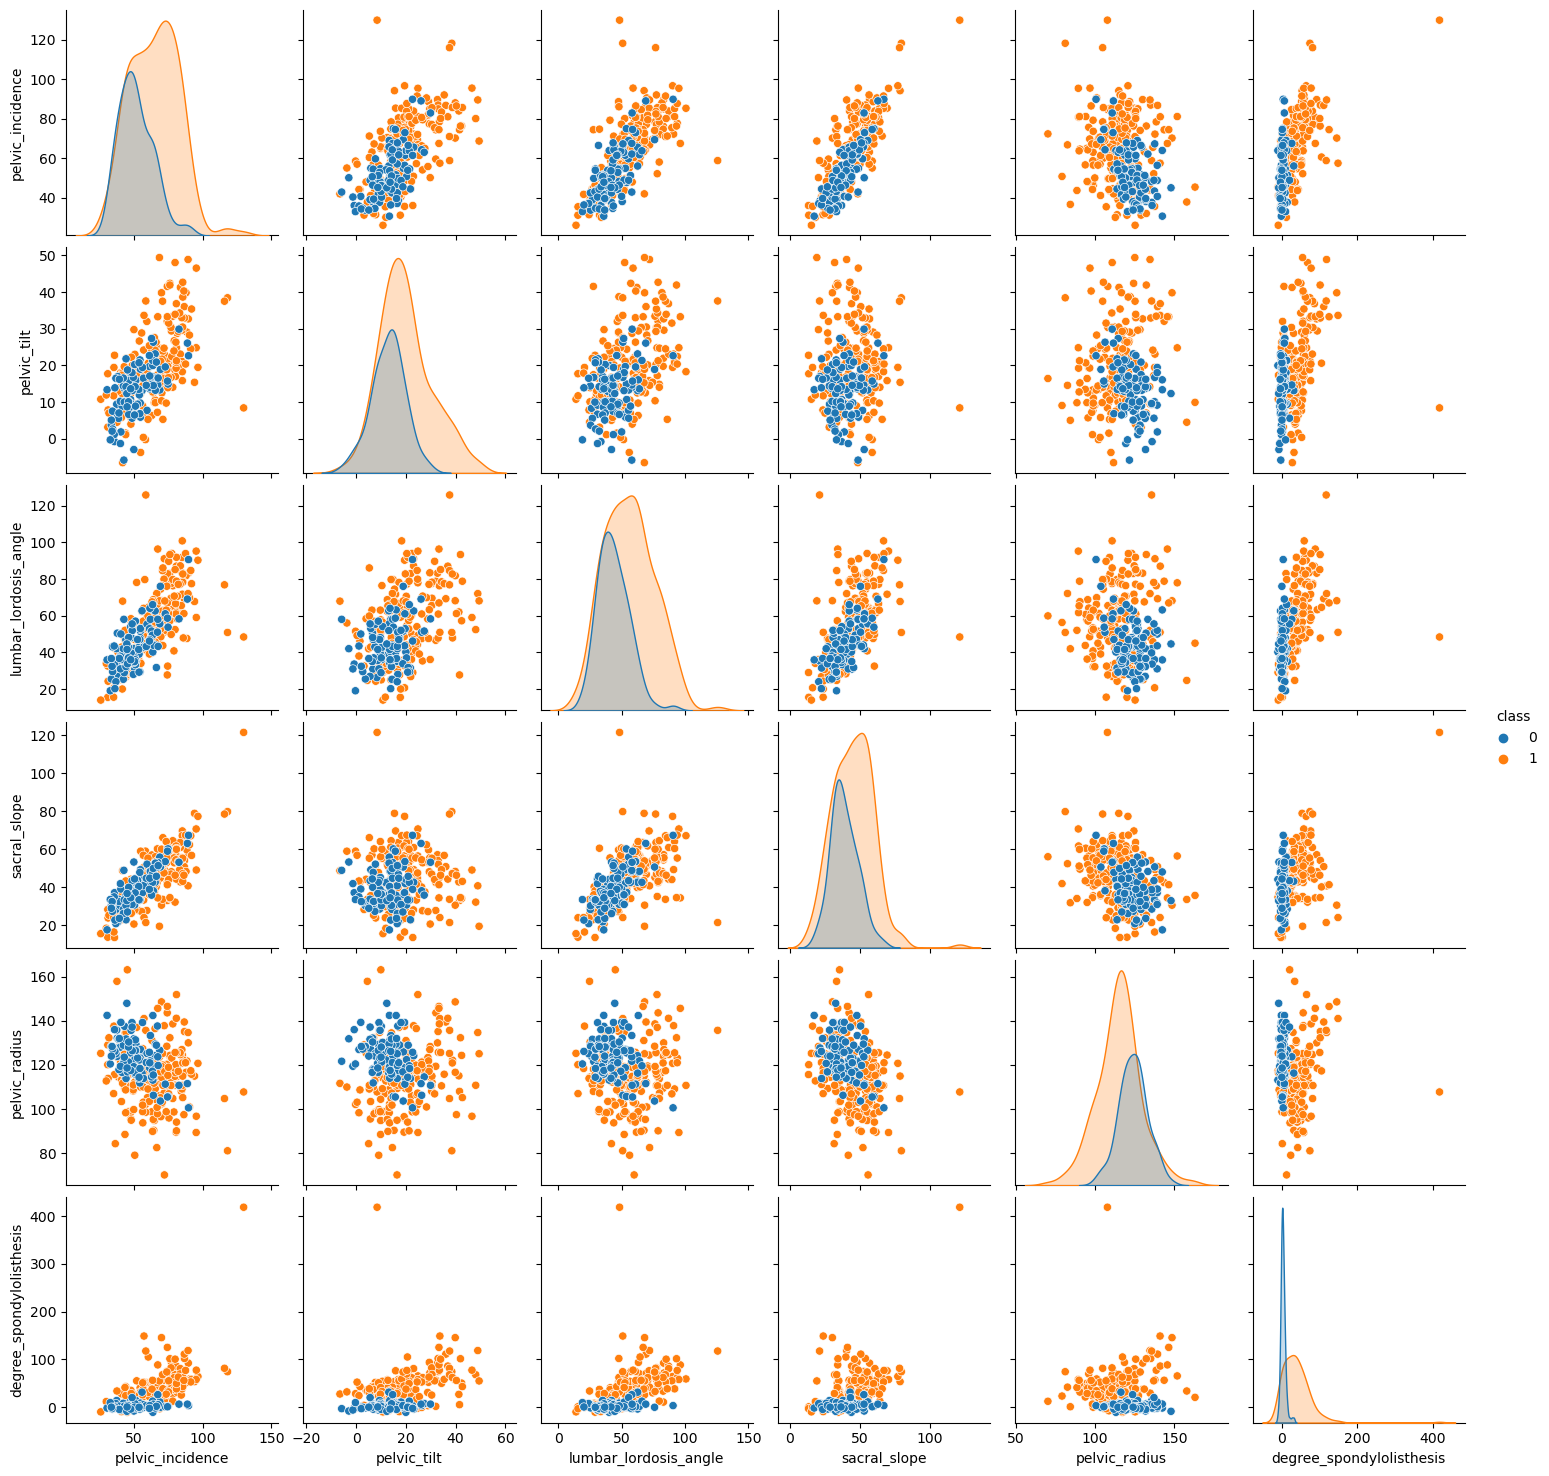

In [115]:
plt.show()

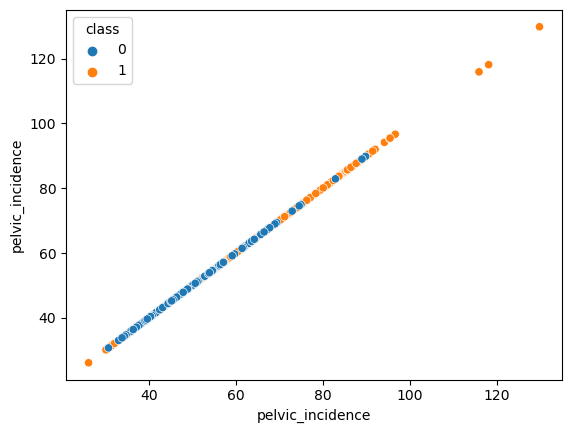

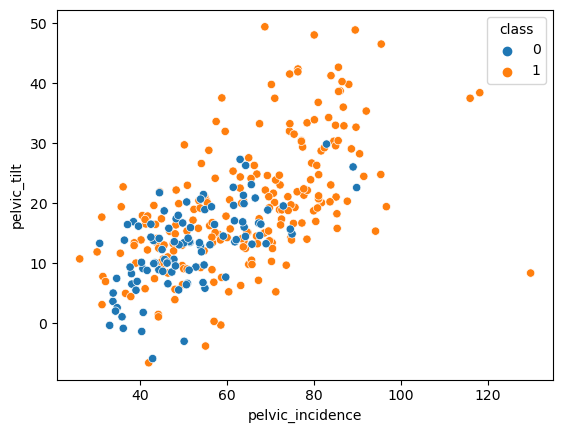

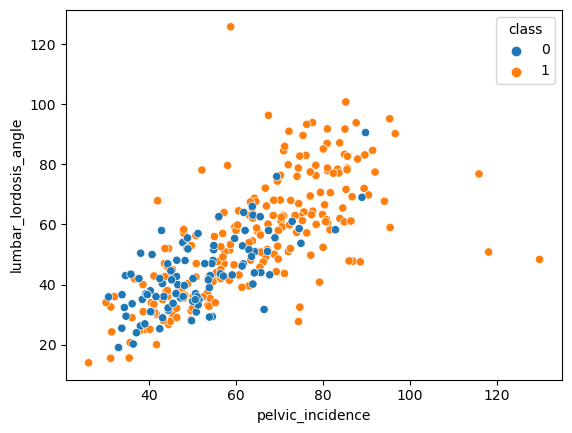

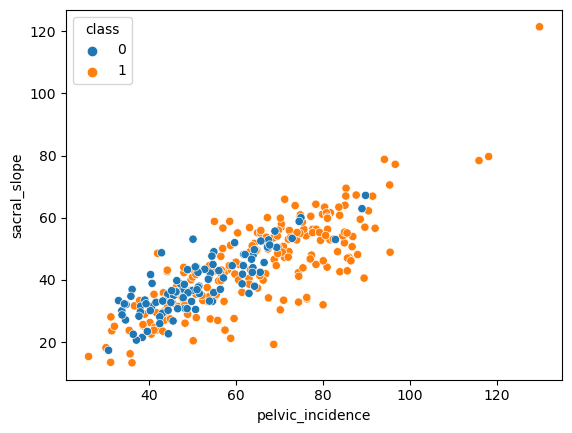

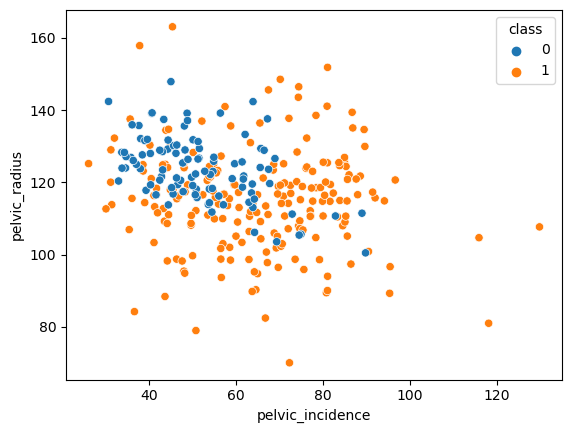

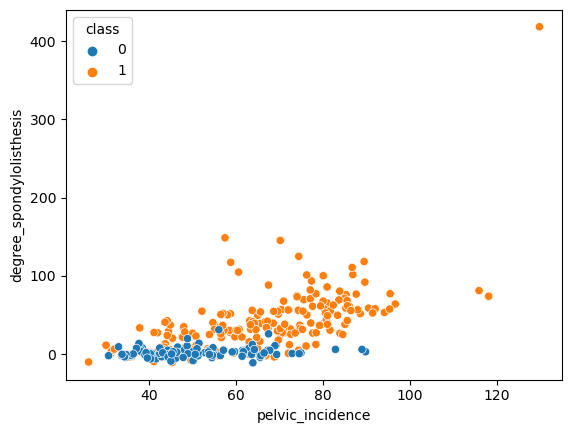

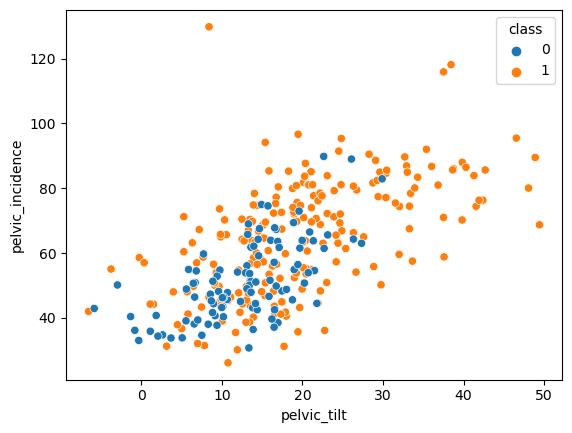

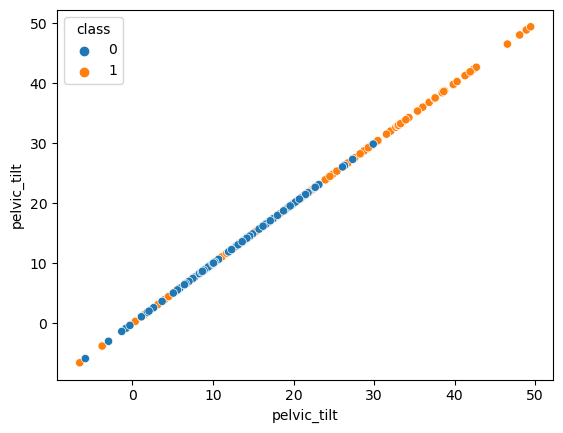

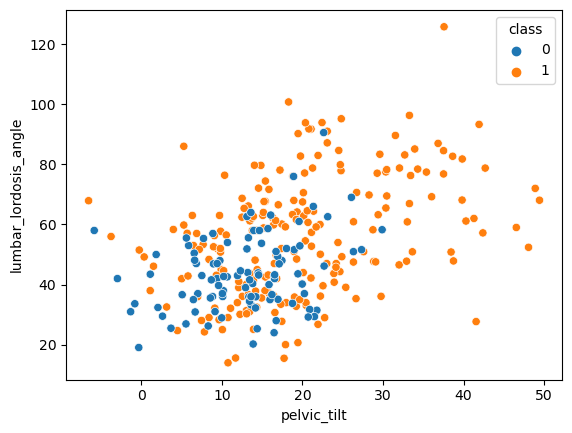

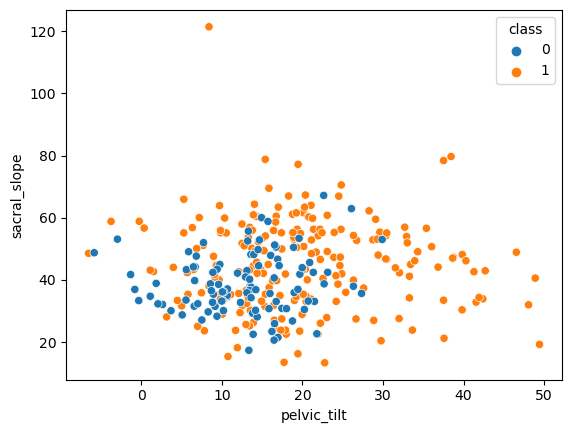

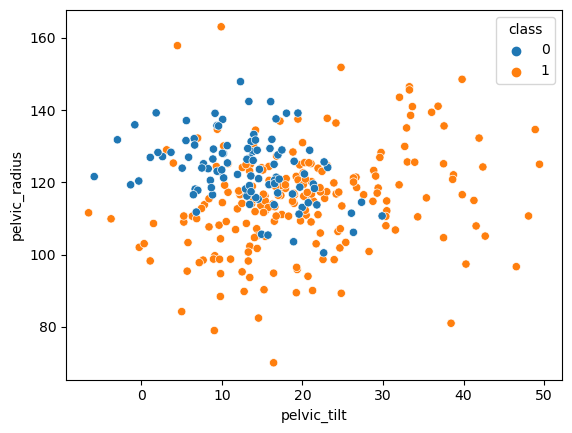

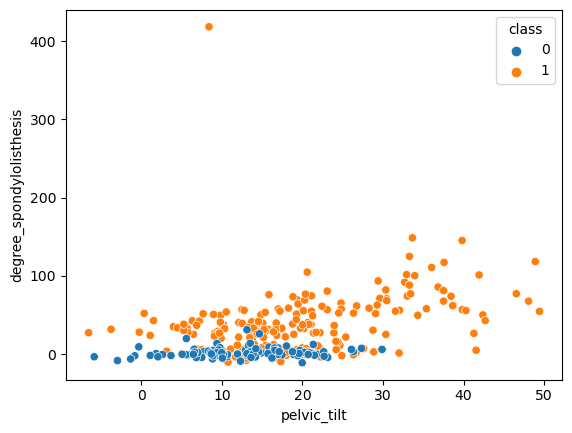

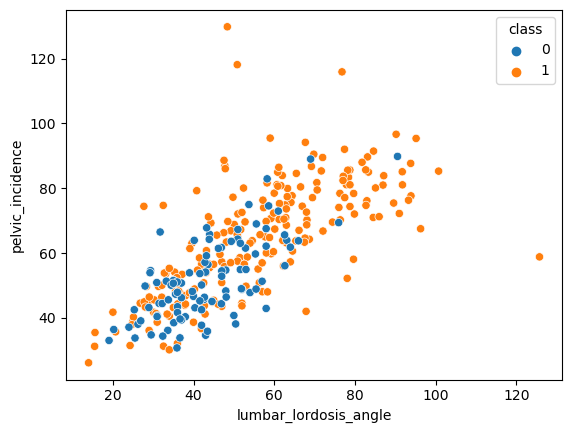

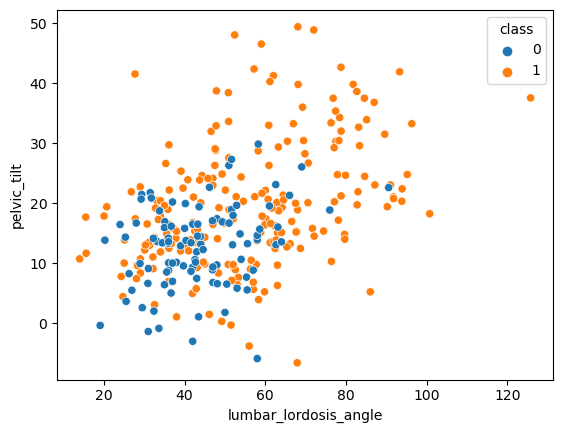

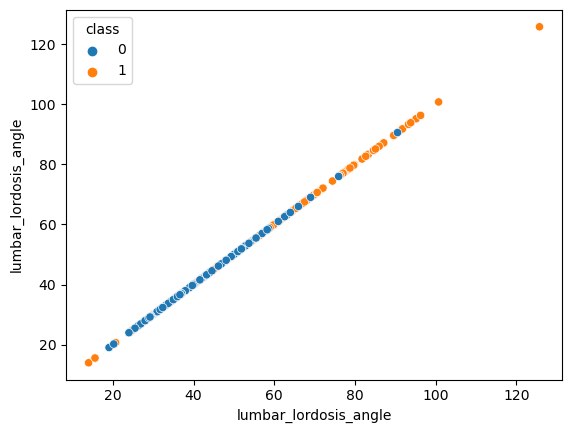

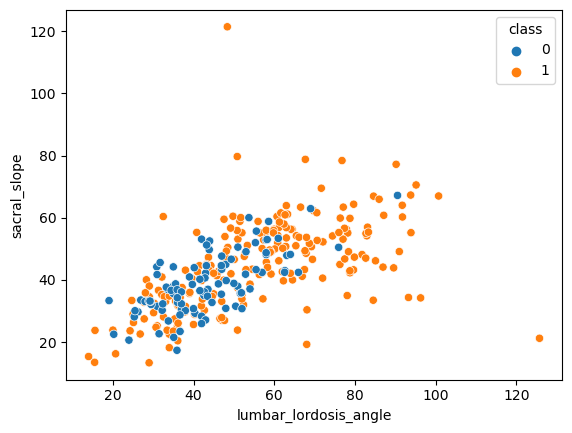

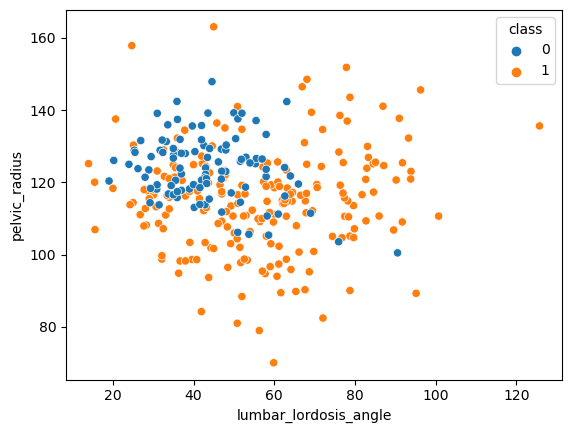

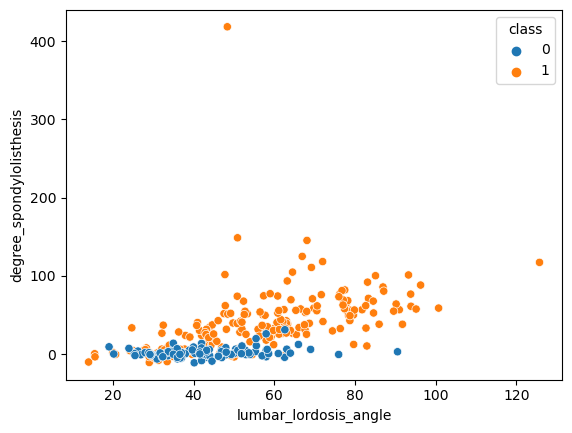

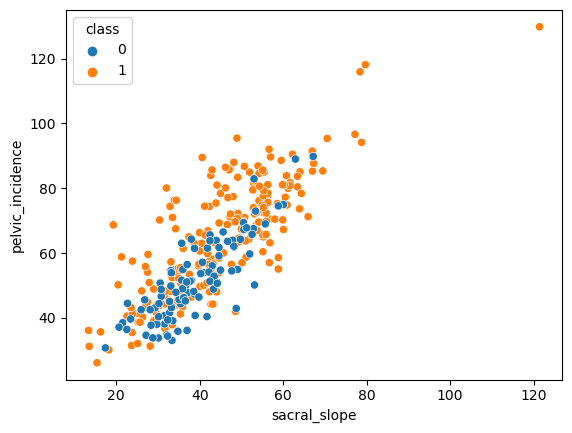

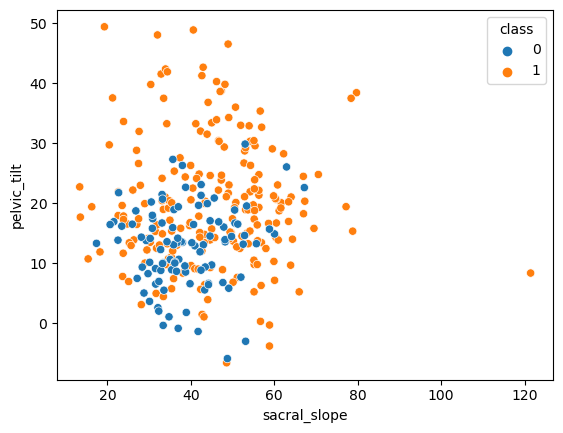

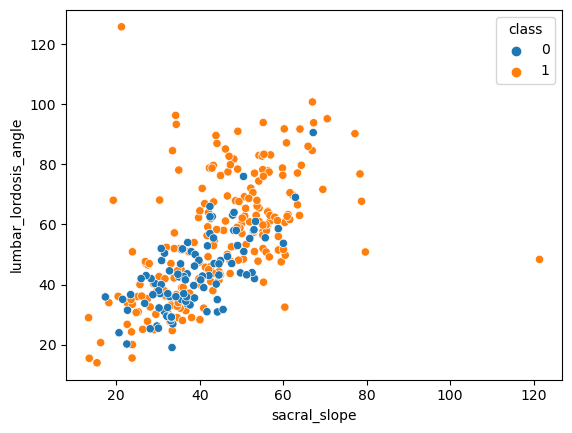

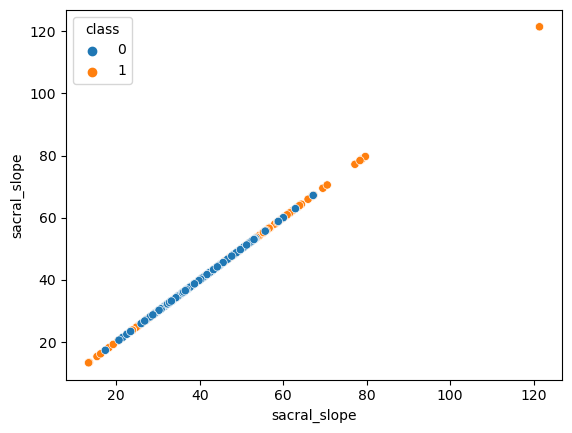

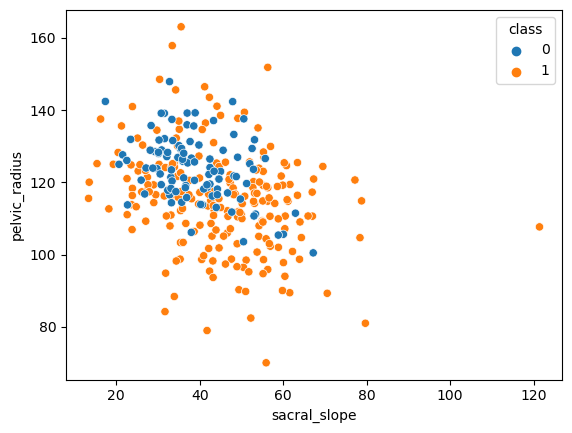

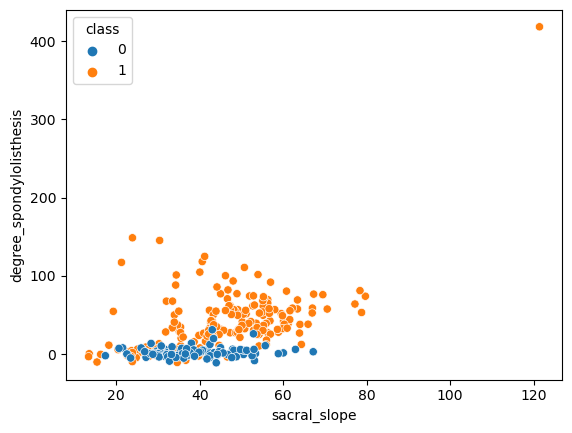

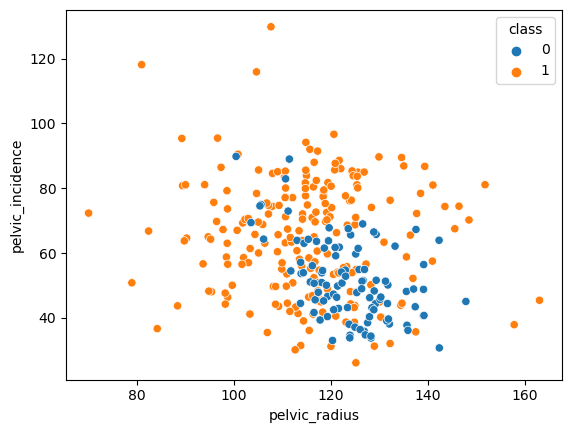

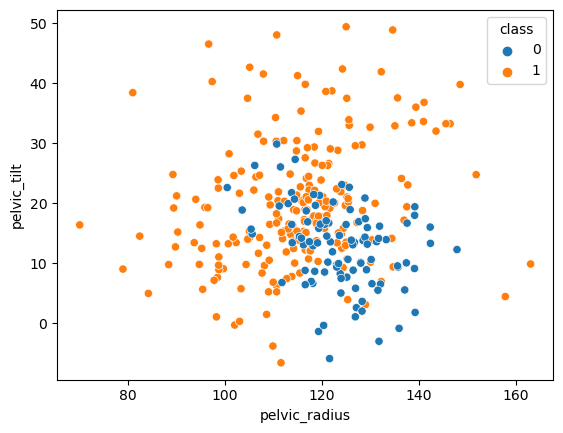

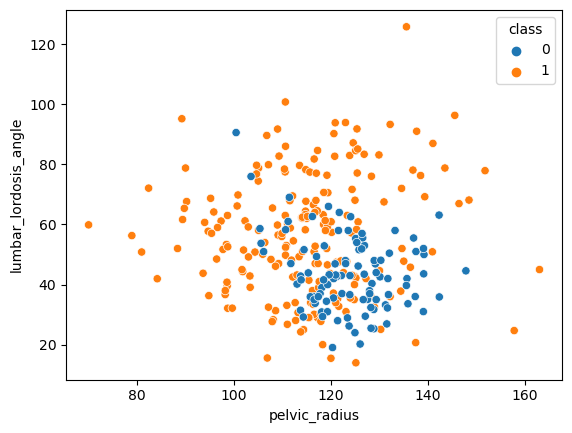

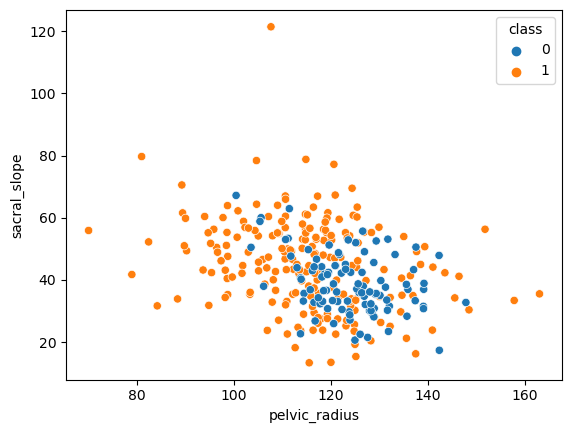

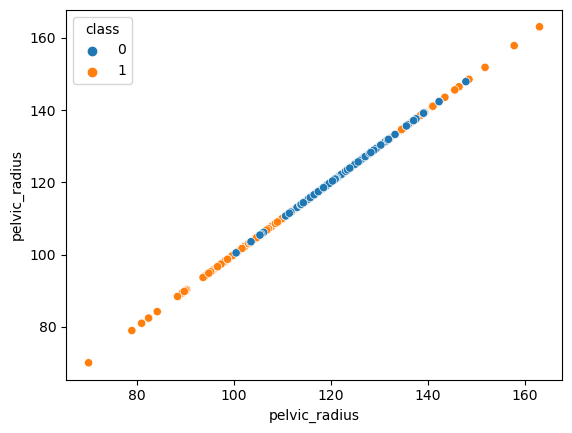

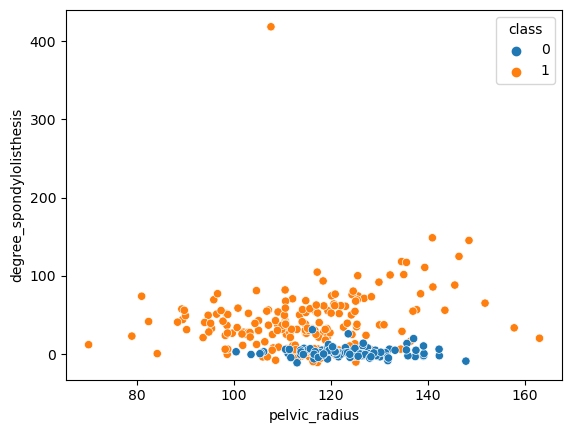

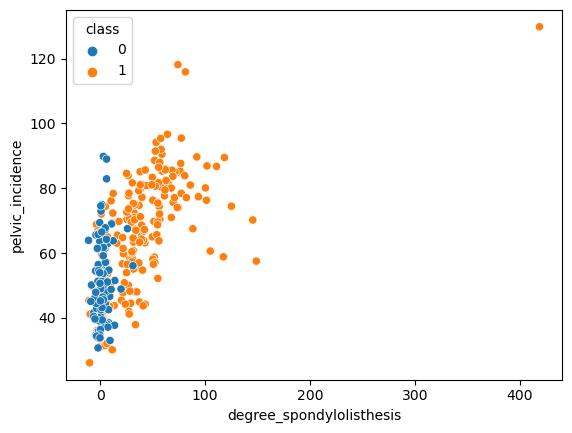

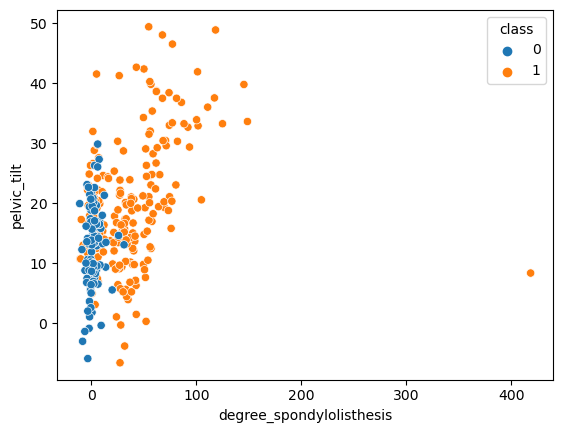

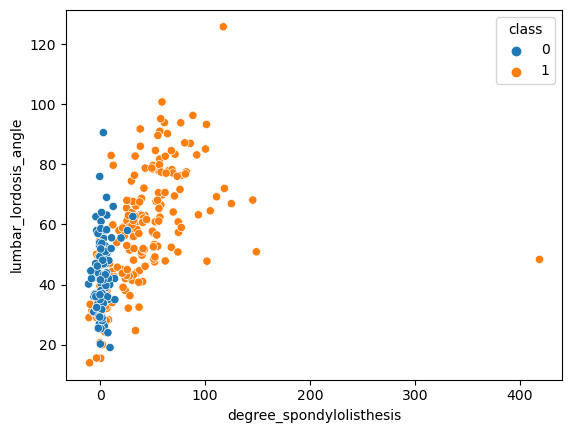

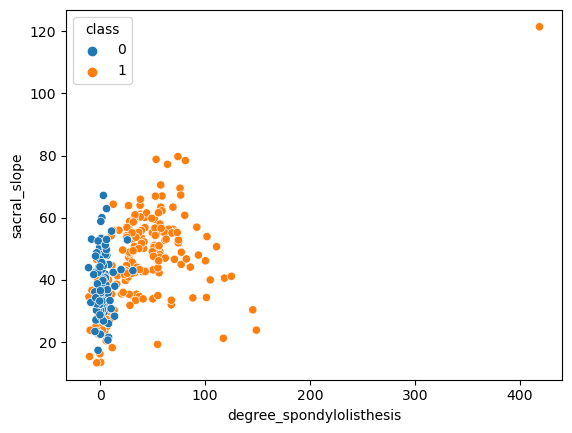

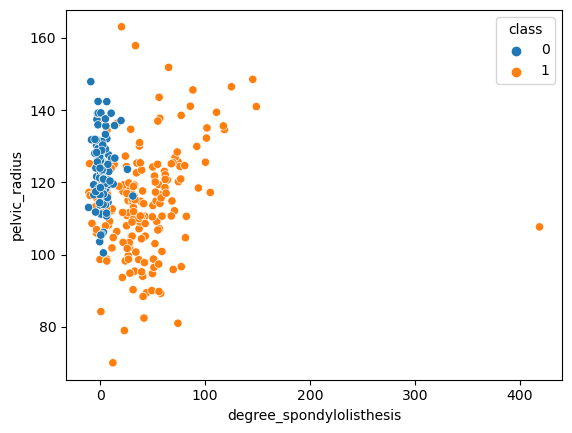

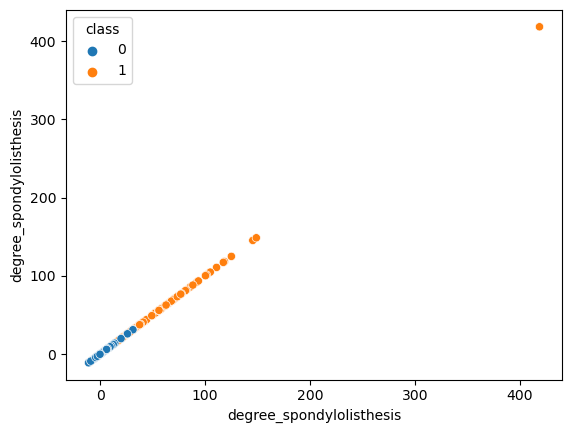

In [116]:
 # or b(i). scatterplot 
    
#arr=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope","pelvic_radius", "degree_spondylolisthesis"] 

for i in range(0,len(arr)):
    for j in range(0,len(arr)):       
        seaborn.scatterplot(data=df, x=df[arr[i]], y=df[arr[j]],hue='class')
        plt.show()





#### ii. Boxplots

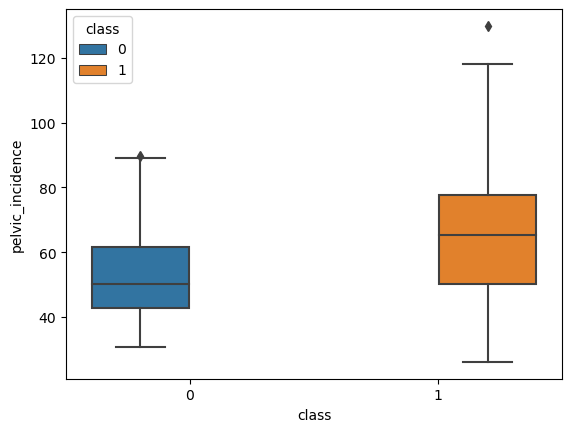

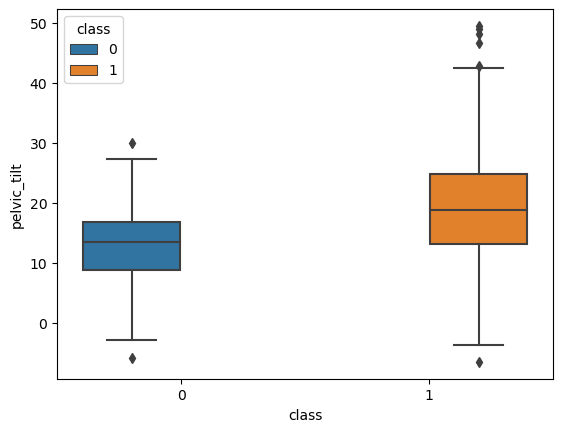

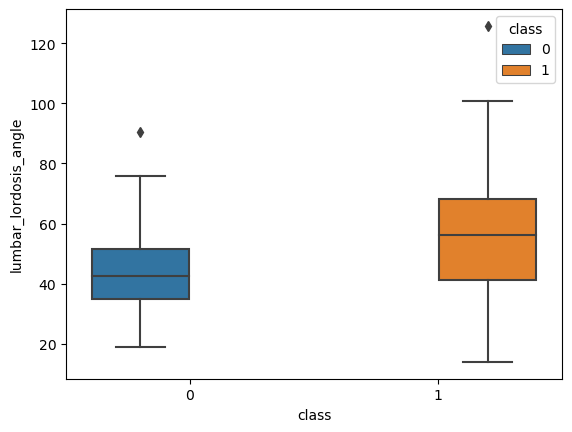

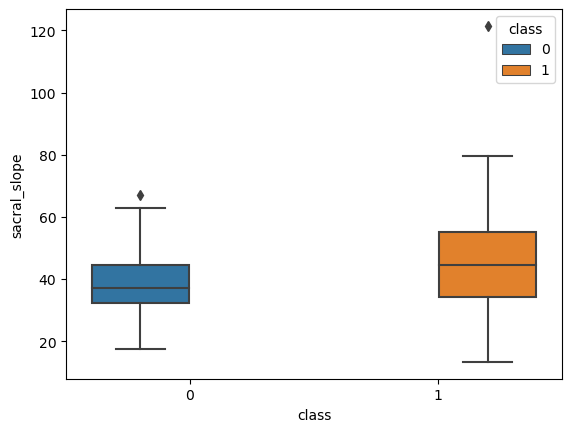

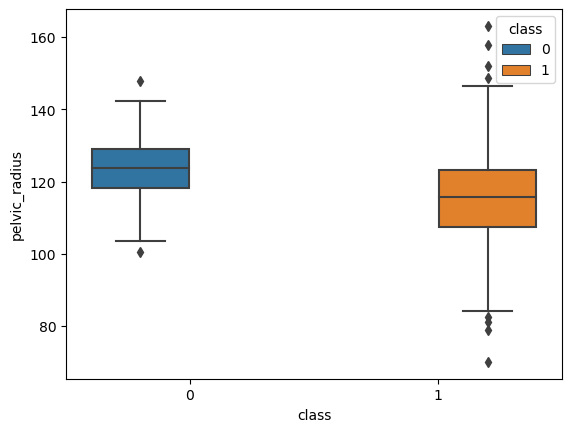

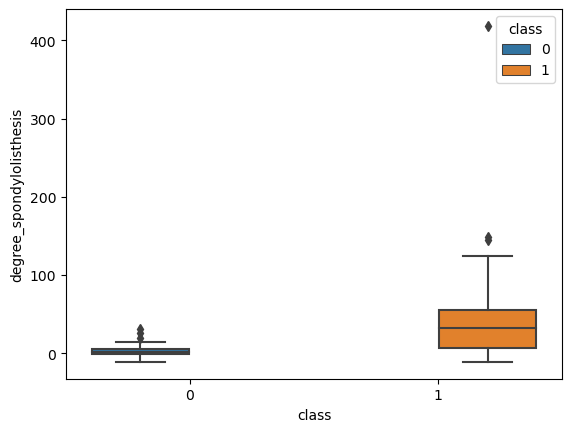

In [117]:
# b. (ii) boxplot

for i in range(0,len(arr)):  
    boxplot=seaborn.boxplot(data=df, x=df['class'], y=df[arr[i]],hue='class')
    plt.show()



#### iii. Split Data Set

In [118]:
train_data_sample_0=df.loc[df['class']==0]
train_data_0=train_data_sample_0.head(70)

test_data_0=train_data_sample_0.tail(-70)

#print("train_data_sample_0",train_data_sample_0)
#print("train_data_0",train_data_0)
#print("test_data_0",test_data_0)

In [119]:
train_data_sample_1=df.loc[df['class'] ==1]
train_data_1=train_data_sample_1.head(140)

test_data_1=train_data_sample_1.tail(-140)


#print(train_data_1)
#print(test_data_1)

In [120]:
train_frames=[train_data_0,train_data_1]
train_data=pd.concat(train_frames)
#print("train_data")
#print(train_data.to_string())

test_frames=[test_data_0,test_data_1]
test_data=pd.concat(test_frames)
#print("test_data")
#print(test_data.to_string())


### (c) Classification

#### i. Euclidean Metric

In [121]:
# c (i)

#from sklearn.neighbors import KNeighborsClassifier
#import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

train_x=train_data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
train_y=train_data['class']

#print(train_y)


test_x=test_data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
test_y=test_data['class']


k = 208
bestk = 0
bestscore = 0
best_kt=0
best_score_t=0
while k > 0:
    knn = KNeighborsClassifier(n_neighbors= k, p=2)
    knn.fit(train_x, train_y)
    test_y_predict = knn.predict(test_x)
    score=knn.score(test_x,test_y,sample_weight=None)
    score_t=knn.score(train_x,train_y,sample_weight=None)
    if score > bestscore:
        bestscore = score
        bestk = k
        
    if score_t > best_score_t:
        best_score_t = score_t
        best_kt = k
        
    k = k - 1
    





#### ii.Test Data :most Suitable k,confusion matrix,true positive rate,true negative rate, precision,and F1-score,error plot

In [122]:
# c(ii) Which k is the most suitable k among those values? 


print("bestk (Best Suitable k ):")
print(bestk)
print("bestscore:")
print(bestscore)

best_k_euc=bestk
best_score_euc=bestscore


print("best training k")
print(best_kt)
print("best training score error:")
print(1-best_score_t)


bestk (Best Suitable k ):
4
bestscore:
0.94
best training k
1
best training score error:
0.0


In [123]:
# c(ii).Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score.

#from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors= 4, p=2)
knn.fit(train_x, train_y.values.ravel())
test_y_predict = knn.predict(test_x)
confusion = confusion_matrix(test_y,test_y_predict)
print("Confusion matrix:")
print(confusion)






Confusion matrix:
[[25  5]
 [ 1 69]]


In [124]:

# c(ii). precision,and F1-score.

#from sklearn.metrics import classification_report
print("F-score + precision:")
print(classification_report(test_y,test_y_predict))


F-score + precision:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [125]:

# c(ii).true positive rate, true negative rate

true_pos_rate = confusion[1,1] / (confusion[1,1]+confusion[1,0])
print("True postive rate:")
print(true_pos_rate)

true_neg_rate = confusion[0,0] / (confusion[0,0]+confusion[0,1])
print("True negative rate:")
print(true_neg_rate)

True postive rate:
0.9857142857142858
True negative rate:
0.8333333333333334


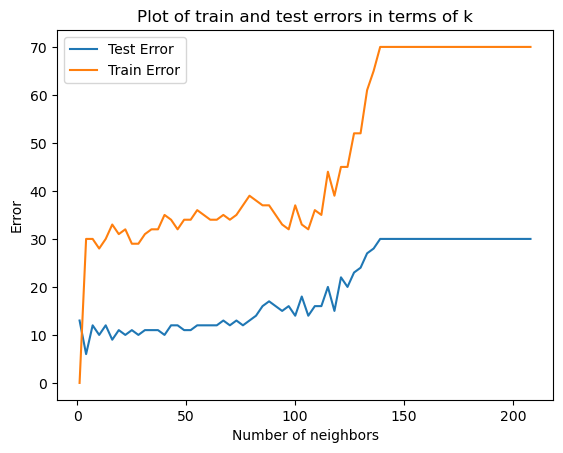

In [126]:
#c(ii) Plot train and test errors in terms of k.

#import numpy as np
#import matplotlib.ticker as mticker

neighbors = np.arange(1,209,3)
train_error =np.empty(len(neighbors))
test_error = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k, p = 2)
    knn.fit(train_x, train_y)
    train_error[i] = (1 - knn.score(train_x, train_y, sample_weight = None))*210
    test_error[i] = (1 - knn.score(test_x,test_y, sample_weight = None))*100

plt.title('Plot of train and test errors in terms of k')
plt.plot(neighbors, test_error, label='Test Error')
plt.plot(neighbors, train_error, label='Train Error')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Error')
plt.show()

#### iii. Learning Curve

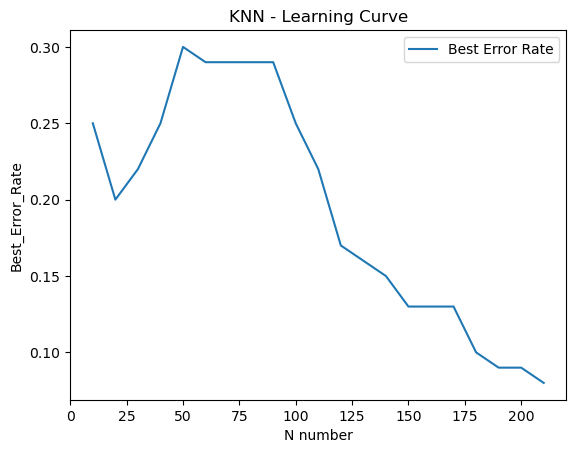

In [127]:
#c(iii). plot Learning Curve.

neighbors = np.arange(0,21)
N = 10
best_error_rate = np.empty(len(neighbors))
i = 0
while N <= 210:
    k2 = 1
    df_train_1 = train_data_sample_1.head(N - int(N / 3))
    df_train_0 = train_data_sample_0.head(int(N / 3))
    
    fin_frames = [df_train_1,df_train_0]
    
    tr = pd.concat(fin_frames)
    
    train_x2 = tr[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
    train_y2 = tr['class']
    
    bestk_2 = 0
    bestscore_2 = 0
    
    while k2 < N:
        
        knn = KNeighborsClassifier(n_neighbors=k2, p=2)
        knn.fit(train_x2, train_y2)
        
        score2=knn.score(test_x,test_y,sample_weight=None)
        if score2 > bestscore_2:
            bestscore_2 = score2
            bestk_2 = k2
        k2 = k2 + 5
    best_error_rate[i] = 1 - bestscore_2
    i = i + 1
    N = N + 10

plt.title('KNN - Learning Curve')
plt.plot(neighbors * 10 + 10, best_error_rate, label='Best Error Rate')
plt.legend()
plt.xlabel('N number')
plt.ylabel('Best_Error_Rate')
plt.show()


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [128]:
# (d) i.A)  Minkowski Distance:  which becomes Manhattan Distance with p = 1.

k_md = 1
best_score_md = 0
best_k_md = 1
while k_md <= 196:
    knn = KNeighborsClassifier(n_neighbors= k_md, p=1)
    knn.fit(train_x, train_y)
    test_y_p = knn.predict(test_x)
    score_md=knn.score(test_x,test_y,sample_weight=None)
    if score_md > best_score_md:
        best_score_md = score_md
        best_k_md = k_md
    k_md = k_md + 5
    
print("KNN best score with manhattan distance:")
print(best_score_md)
print("KNN best K with manhattan distance:")
print(best_k_md)



KNN best score with manhattan distance:
0.89
KNN best K with manhattan distance:
6


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [129]:
# (d) iB). What is the best log10(p)?

b_score = 0
best_i = 0
i = 0.1
while i <= 1:
    knn = KNeighborsClassifier(n_neighbors= 6, metric = 'minkowski', p=pow(10,i))
    knn.fit(train_x, train_y)
    test_y_p1 = knn.predict(test_x)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > b_score:
        b_score = score
        best_i = i
    i = i + 0.1
print("Best Score:")
print(b_score)
print("best log10(p):")
print(best_i)




Best Score:
0.94
best log10(p):
0.6


##### C. Chebyshev Distance With p -> infinity.

In [130]:
# d. i. C.)  which becomes Chebyshev Distance with p → ∞

k_c = 1
best_scored_C = 0
best_kdC = 1
i = 0
while k_c <= 196:
    knn = KNeighborsClassifier(n_neighbors= k_c, metric = 'chebyshev', p=float('inf'))
    knn.fit(train_x, train_y)
    test_y_p3 = knn.predict(test_x)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > best_scored_C:
        best_scored_C = score
        best_kdC = k_c
    i = i + 1
    k_c = k_c + 5
print("Best scored:")
print(best_scored_C)
print("Best k for Chebyshev Distance with p → ∞ :")
print(best_kdC)

Best scored:
0.92
Best k for Chebyshev Distance with p → ∞ :
16


#### ii. Mahalanobis Distance.

In [131]:
# d) ii. Mahalanobis Distance.

k = 1
best_scored_mad = 0
best_k_mad = 1
S = train_x.cov().T



while k <= 196:
    knn=KNeighborsClassifier(n_neighbors=k,metric='mahalanobis', metric_params={'VI': S})
    knn.fit(train_x,train_y)
    test_y_predict = knn.predict(test_x)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > best_scored_mad:
        best_scored_mad = score
        best_k_mad = k
    k = k + 5
    
print("Best score:")
print(best_scored_mad)
print("Best k for  Mahalanobis Distance.:")
print(best_k_mad)



Best score:
0.92
Best k for  Mahalanobis Distance.:
6


#### iii. Summarize the test errors

In [132]:
# d. Summarize the test errors

data_tab = {'DistanceName':['Manhattan p=1','logp=0.6','Chebyshev','Mahalanobis', 'Euclidean'],'BestK':[best_k_md,6.0,best_kdC,best_k_mad,best_k_euc],'TestErrors%':[(1-best_score_md)*100,(1-b_score)*100,(1-best_scored_C)*100,(1-best_scored_mad)*100,(1-best_score_euc)*100]}
res_tab = pd.DataFrame(data_tab)
res_tab

,DistanceName,BestK,TestErrors%
0,Manhattan p=1,6.0,11.0
1,logp=0.6,6.0,6.0
2,Chebyshev,16.0,8.0
3,Mahalanobis,6.0,8.0
4,Euclidean,4.0,6.0


### (e) Weighted Decision

In [133]:


# (e) Euclidean

k = 1
best_score_ed = 0
best_k_ed= 1

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=2, weights = 'distance')
    knn.fit(train_x,train_y)
    test_y_pr = knn.predict(test_x)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > best_score_ed:
        best_score_ed = score
        best_k_ed = k
    k = k + 5
print("Best Score:")
print(best_score_ed)
print("Best k Euclidean:")
print(best_k_ed)




Best Score:
0.9
Best k Euclidean:
6


In [134]:
# (e) Manhattan

k = 1
best_score_mn = 0
best_k_mn = 1
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=1, weights = 'distance')
    knn.fit(train_x, train_y)
    test_y_pr = knn.predict(test_x)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > best_score_mn:
        best_score_mn = score
        best_k_mn = k
    k = k + 5
print("Best Score:")
print(best_score_mn)
print("Best k Manhattan:")
print(best_k_mn)

Best Score:
0.9
Best k Manhattan:
26


In [135]:
# (e) Chebyshev

k = 1
best_score_cv = 0
best_k_cv = 1
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'chebyshev', p=float('inf'), weights = 'distance')
    knn.fit(train_x, train_y)
    test_y_pr = knn.predict(test_x)
    score=knn.score(test_x,test_y,sample_weight=None)
    if score > best_score_cv:
        best_score_cv = score
        best_k_cv = k
    k = k + 5
print("Best Score:")
print(best_score_cv)
print("Best k for Chebyshev :")
print(best_k_cv)

Best Score:
0.89
Best k for Chebyshev :
16


In [136]:

# (e). report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

summary_data = {'DistanceName':['Euclidean','Manhattan','Chebyshev'],'BestK':[best_k_ed,best_k_mn,best_k_cv],'TestErrors%':[(1-best_score_ed)*100,(1-best_score_mn)*100,(1-best_score_cv)*100]}
final_res = pd.DataFrame(summary_data)
final_res

,DistanceName,BestK,TestErrors%
0,Euclidean,6,10.0
1,Manhattan,26,10.0
2,Chebyshev,16,11.0


### (f) Training Error Rate

Qf. What is the lowest training error rate you achieved in this homework?

Ans. 0 in Euclidean , k=1.